In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
filename='TATAPOWER.NS.csv'  #change filename
df=pd.read_csv(filename)

In [41]:
print(df.head)
print(df.shape)

<bound method NDFrame.head of             Date        Open        High  ...       Close   Adj Close     Volume
0     2010-01-04  133.751373  135.097580  ...  134.079483  106.125458  3172720.0
1     2010-01-05  134.716400  137.997452  ...  136.033646  107.672203  4254349.0
2     2010-01-06  136.067413  144.366562  ...  142.344849  112.667587  8747201.0
3     2010-01-07  142.822540  144.945572  ...  142.933517  113.133553  5495560.0
4     2010-01-08  143.305054  144.077057  ...  142.856308  113.072418  3916987.0
...          ...         ...         ...  ...         ...         ...        ...
2463  2019-12-23   55.000000   56.000000  ...   55.750000   54.009567  6340544.0
2464  2019-12-24   56.450001   56.650002  ...   56.099998   54.348640  7649247.0
2465  2019-12-26   56.000000   56.549999  ...   55.150002   53.428299  4026238.0
2466  2019-12-27   55.299999   56.299999  ...   56.099998   54.348640  2983035.0
2467  2019-12-30   55.900002   56.700001  ...   56.450001   54.687714  3198070.

In [42]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [43]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Adj Close'])
print(new_data)

     Date Adj Close
0     NaN       NaN
1     NaN       NaN
2     NaN       NaN
3     NaN       NaN
4     NaN       NaN
...   ...       ...
2463  NaN       NaN
2464  NaN       NaN
2465  NaN       NaN
2466  NaN       NaN
2467  NaN       NaN

[2468 rows x 2 columns]


In [44]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Adj Close'][i] = data['Adj Close'][i]
new_data = new_data.dropna(how='any',axis=0)


In [45]:
print(new_data)

                     Date Adj Close
0     2010-01-04 00:00:00   106.125
1     2010-01-05 00:00:00   107.672
2     2010-01-06 00:00:00   112.668
3     2010-01-07 00:00:00   113.134
4     2010-01-08 00:00:00   113.072
...                   ...       ...
2463  2019-12-23 00:00:00   54.0096
2464  2019-12-24 00:00:00   54.3486
2465  2019-12-26 00:00:00   53.4283
2466  2019-12-27 00:00:00   54.3486
2467  2019-12-30 00:00:00   54.6877

[2460 rows x 2 columns]


In [46]:
#split into train and validation
train_len= int(0.8*len(data))
train = new_data[:train_len]
valid = new_data[train_len:]
# print(train.shape)
# print(valid.shape)


In [47]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-480+i:].sum() + sum(preds)
    b = a/488
    preds.append(b)



In [48]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
8.075094229893782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


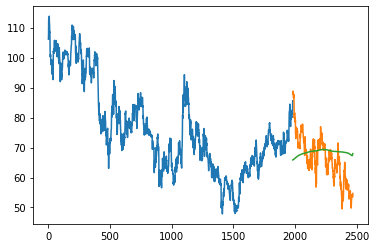

In [49]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])